
<h1 align=center><font>Universidad Autónoma de Baja California</font></h1>
<h2 align=center><font>Miguel A. Cuevas González</font></h2>

<p style="text-align:center">
    <img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Flogodix.com%2Flogo%2F1859054.png&f=1&nofb=1&ipt=3010d2055192fe99807d4783ce1c2b60ecda48f6c60276bfd06d6b33c1af72ed&ipo=images" width="200" alt="Skills Network Logo"  />
    </a>
</p>




# World Happiness

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# import kaggle

# kaggle.api.authenticate()
# kaggle.api.dataset_download_files('unsdsn/world-happiness', path='../data', unzip=True)
# kaggle.api.dataset_download_files('pedroisrael/all-years-clean-data', path='../data', unzip=True)

In [3]:
sns.set_palette("magma")
sns.set_style("darkgrid")

# Preprocesamiento de datos

In [4]:
df1 = pd.read_csv('../data/2015.csv')
df2 = pd.read_csv('../data/2016.csv')
df3 = pd.read_csv('../data/2017.csv')
df4 = pd.read_csv('../data/2018.csv')
df5 = pd.read_csv('../data/2019.csv')

Debido a que cada .csv contiene diferentes atributos y formatos, necesitamos unirlos en un solo archivo .csv para poder trabajar con ellos.

In [5]:
df1 = df1.drop(['Standard Error', 'Dystopia Residual'], axis=1)
df2 = df2.drop(['Lower Confidence Interval', 'Upper Confidence Interval', 'Dystopia Residual'], axis=1)
df3 = df3.drop(['Whisker.high', 'Whisker.low', 'Dystopia.Residual'], axis=1)

df1.rename(columns={'Happiness Rank': 'Rank', 'Family' : 'Social support'}, inplace=True)
df2.rename(columns={'Happiness Rank': 'Rank', 'Family' : 'Social support'}, inplace=True)
df3.rename(columns={'Happiness.Rank': 'Rank', 'Happiness.Score': 'Happiness Score', 'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)', 'Health..Life.Expectancy.': 'Health (Life Expectancy)', 'Trust..Government.Corruption.': 'Trust (Government Corruption)', 'Dystopia.Residual': 'Dystopia Residual', 'Family' : 'Social support'}, inplace=True)
df4.rename(columns={'Country or region': 'Country', 'Score': 'Happiness Score', 'GDP per capita': 'Economy (GDP per Capita)', 'Healthy life expectancy': 'Health (Life Expectancy)', 'Freedom to make life choices': 'Freedom', 'Perceptions of corruption': 'Trust (Government Corruption)', 'Overall rank': 'Rank'}, inplace=True)
df5.rename(columns={'Country or region': 'Country', 'Score': 'Happiness Score', 'GDP per capita': 'Economy (GDP per Capita)', 'Healthy life expectancy': 'Health (Life Expectancy)', 'Freedom to make life choices': 'Freedom', 'Perceptions of corruption': 'Trust (Government Corruption)', 'Overall rank': 'Rank'}, inplace=True)

In [6]:
df1['Year'] = 2015
df2['Year'] = 2016
df3['Year'] = 2017
df4['Year'] = 2018
df5['Year'] = 2019

In [7]:
df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)
df.head()

,Country,Region,Rank,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


## Renombrar paises repetidos

Existen diferentes países que aparecen repetidos o con diferentes nombres, por los que necesitamos unificarlos. Los países que aparecen repetidos son: Northern Cyprus, Hong Kong, Macedonia, Trinidad and tobago, Somalia, Taiwan.

In [8]:
# dictionary of countries to rename

rename_dict = {'North Cyprus' : 'Northern Cyprus', 'Taiwan Province of China' : 'Taiwan' , 'Hong Kong S.A.R., China' : 'Hong Kong' , 'Somaliland region' : 'Somalia' , 'Macedonia' : 'North Macedonia', 'Congo (Brazzaville)' : 'Republic of the Congo', 'Congo (Kinshasa)' : 'Democratic Republic of the Congo', 'Trinidad & Tobago' : 'Trinidad and Tobago'}

df['Country'] = df['Country'].replace(rename_dict)
df['Country'].nunique()

164

Eliminamos los paises que no cuenten con datos en todos los años

In [9]:
countries = df['Country'].value_counts()
countries = countries[countries == 5]
countries = countries.index.tolist()

df = df[df['Country'].isin(countries)]

df['Country'].nunique()

147

## Rellenar datos faltantes en regiones

No todas los paises cuentan con el atributo `Region` en los cinco años, por lo que necesitamos rellenar los datos faltantes, o eliminar en caso de que no se pueda rellenar.

In [10]:
def fill_region(group):
    # If all 'Region' values are missing, return None
    if group['Region'].isnull().all():
        return None
    # Otherwise, fill missing 'Region' values with the first non-missing value
    else:
        return group.fillna({'Region': group['Region'].dropna().iloc[0]})

# Apply the function to each group of rows with the same 'Country'
df = df.groupby('Country')[df.columns.tolist()].apply(fill_region).reset_index(drop=True)

# Drop rows with missing 'Region' values
df = df.dropna(subset=['Region'])

In [11]:
df['Region'].value_counts()

Region
Sub-Saharan Africa                 160
Central and Eastern Europe         145
Latin America and Caribbean        105
Western Europe                     105
Middle East and Northern Africa     95
Southeastern Asia                   40
Southern Asia                       35
Eastern Asia                        30
Australia and New Zealand           10
North America                       10
Name: count, dtype: int64

## Eliminar valores en 0

In [12]:
df.describe()

,Rank,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
count,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,734.000000,735.000000,735.000000
mean,76.378231,5.437478,0.938063,1.093466,0.632885,0.415879,0.125278,0.219687,2017.000000
std,44.677422,1.111781,0.401523,0.322561,0.236938,0.148031,0.107700,0.123874,1.415177
min,1.000000,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,38.000000,4.562000,0.650229,0.878175,0.496735,0.312664,0.053000,0.130000,2016.000000
50%,75.000000,5.410000,1.004000,1.139350,0.668250,0.434000,0.088950,0.202000,2017.000000
75%,114.500000,6.256500,1.251070,1.349755,0.813845,0.532030,0.155340,0.281500,2018.000000
max,158.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.551910,0.838075,2019.000000


In [13]:
df = df.replace(0, np.nan)
df = df.dropna()
df.describe()

,Rank,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
count,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000
mean,75.754558,5.452265,0.944998,1.100495,0.636963,0.420746,0.126698,0.220712,2017.001403
std,44.937785,1.118303,0.394784,0.320094,0.232411,0.143969,0.107735,0.123717,1.413716
min,1.000000,2.839000,0.015300,0.104190,0.005565,0.013000,0.001000,0.001990,2015.000000
25%,37.000000,4.559000,0.663200,0.886000,0.500533,0.323770,0.054000,0.130000,2016.000000
50%,74.000000,5.458000,1.009850,1.146217,0.669000,0.435970,0.089981,0.202000,2017.000000
75%,115.000000,6.298000,1.258000,1.360000,0.814870,0.534660,0.156390,0.283100,2018.000000
max,158.000000,7.769000,1.870766,1.644000,1.141000,0.724000,0.551910,0.838075,2019.000000


In [14]:
df.isnull().sum()

Country                          0
Region                           0
Rank                             0
Happiness Score                  0
Economy (GDP per Capita)         0
Social support                   0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Year                             0
dtype: int64

In [15]:
df['Rank'] = df.groupby('Year')['Happiness Score'].rank(ascending=False)
df = df.sort_values(by=['Year', 'Rank'])
df.reset_index(drop=True, inplace=True)

df.head()

,Country,Region,Rank,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,Western Europe,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


# Analisis de Datos

Empecemos creando una matriz de correlación para ver si existe alguna relación entre las variables.

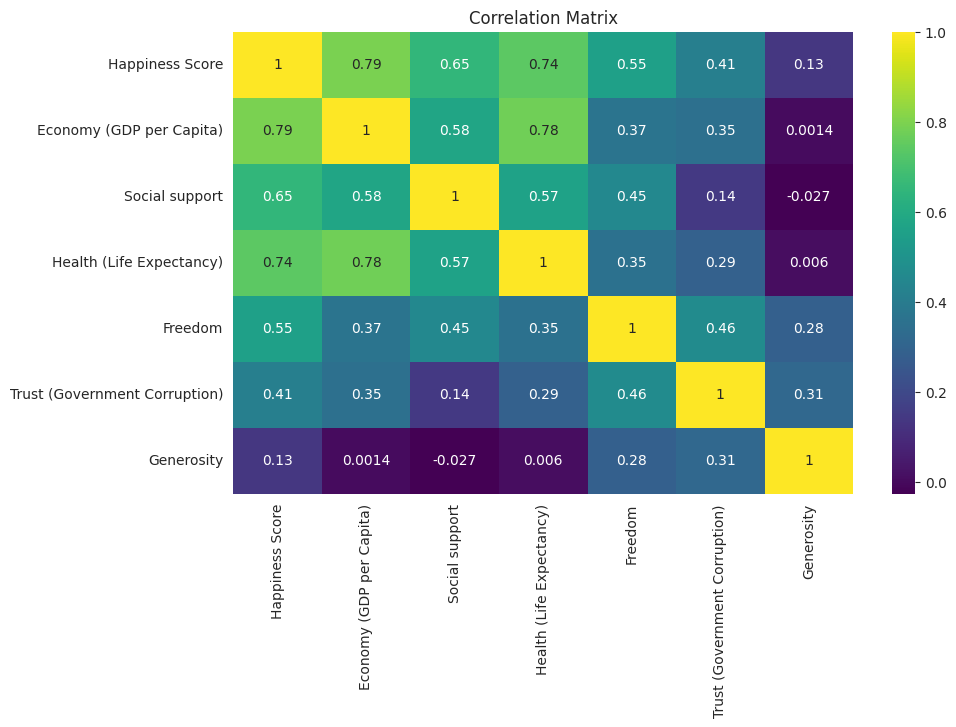

In [16]:
numeric_cols = df.select_dtypes(include=[np.number])
numeric_cols = numeric_cols.drop(['Year', 'Rank'], axis=1)

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

Como se puede observar, las variables que tienen una correlación más alta con la felicidad son: __GDP per capita, Social support y Healthy (life expectancy).__

# Visualización de correlaciones

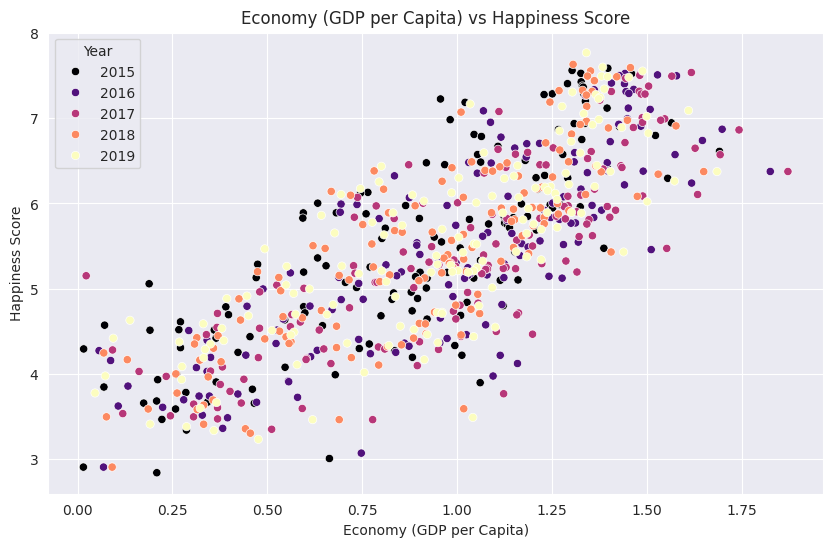

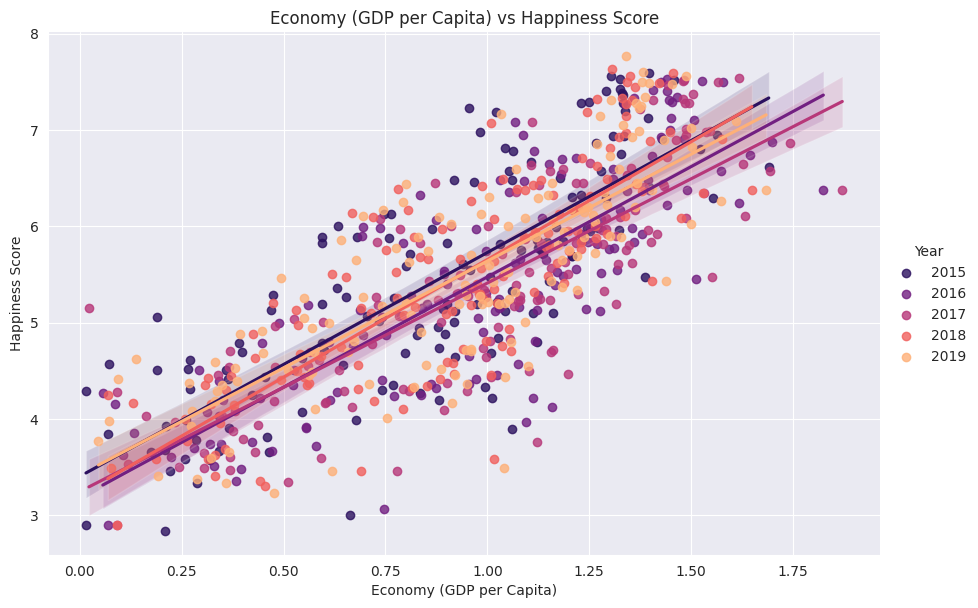

In [17]:
from world_happiness_data_analysis.lib import plot_relation

plot_relation('Economy (GDP per Capita)', 'Happiness Score', df, palette='magma')

Graficando la relación entre la felicidad y el GDP per capita, se puede observar que efectivamente existe una relación lineal entre ambas variables. Podemos notar lo mismo con en las siguientes graficas, con la felicidad y el Social support.

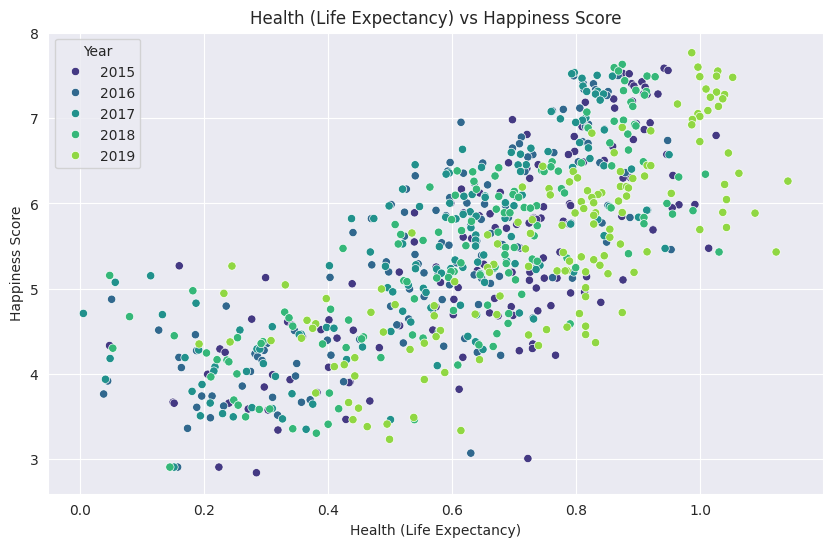

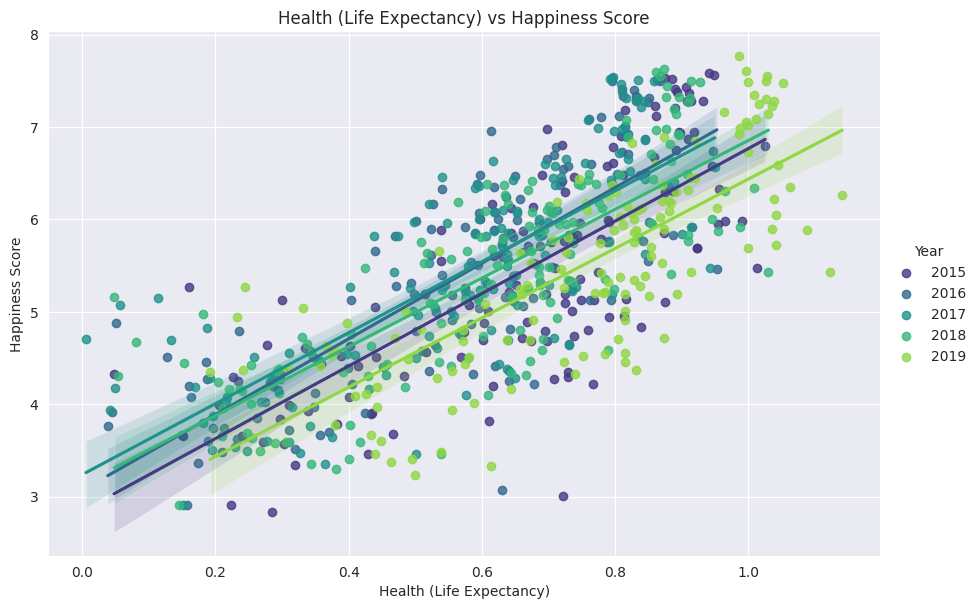

In [18]:
plot_relation('Health (Life Expectancy)', 'Happiness Score', df, palette='viridis')

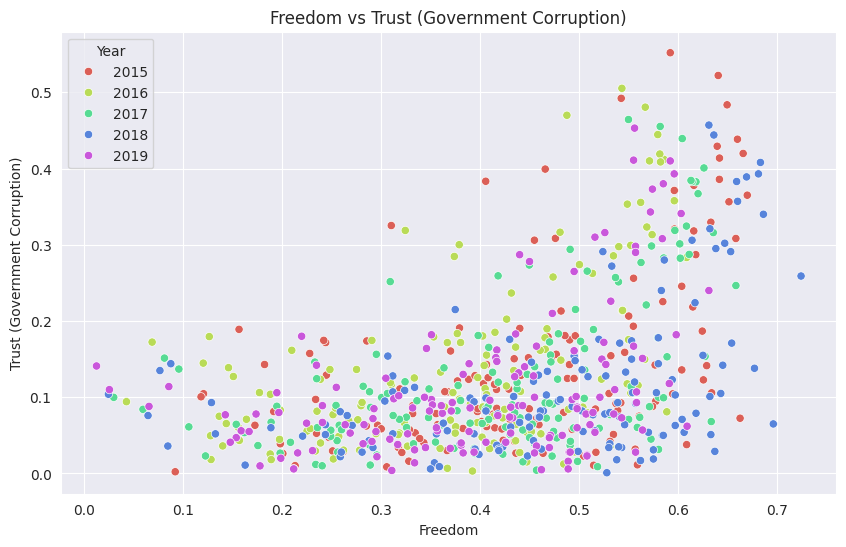

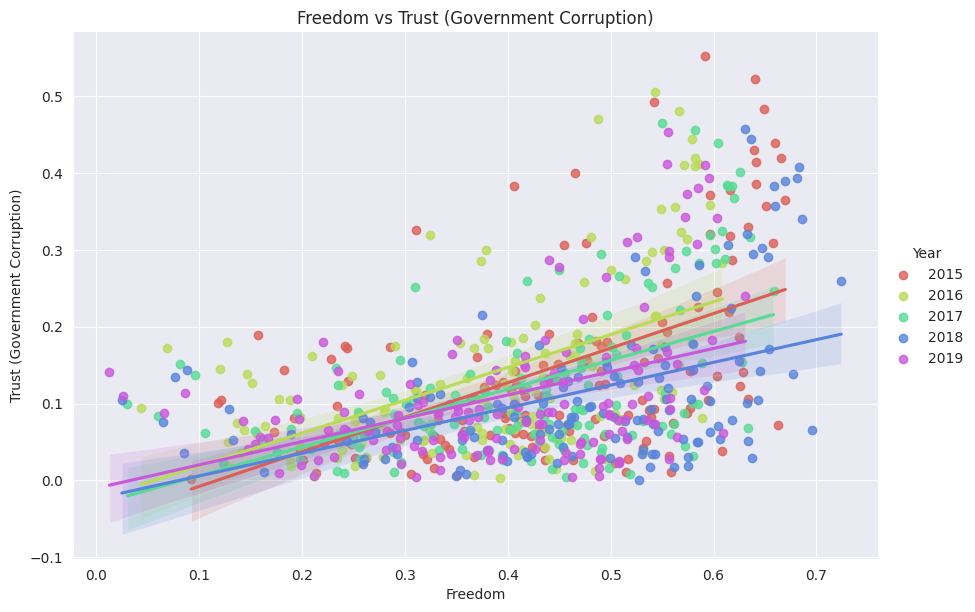

In [19]:
plot_relation('Freedom', 'Trust (Government Corruption)', df, palette='hls')

Se puede esperar a que `Trust` y `Freedom` tengan una relación lineal emtre sí, ya que ambas variables están relacionadas con la libertad y la confianza en el gobierno, sin embargo, no es el caso.

En la siguiente tabla se muestran los top 5 paises más felices en cada año.

In [20]:
new_df = df[df['Rank'] <= 5]
top_5 = pd.DataFrame()

for row in new_df.iterrows():
    year = row[1]['Year']
    rank = row[1]['Rank']
    country = row[1]['Country']
    top_5.loc[rank, year] = country
top_5

,2015,2016,2017,2018,2019
1,Switzerland,Denmark,Norway,Finland,Finland
2,Iceland,Switzerland,Denmark,Norway,Denmark
3,Denmark,Iceland,Iceland,Denmark,Norway
4,Norway,Norway,Switzerland,Iceland,Iceland
5,Canada,Finland,Finland,Switzerland,Netherlands


- El unico pais que se mantiene en el top 5 en los cinco años es Finlandia.
- Canada es el unico pais fuera de Europa que se ha encuentrado en el top 5.

# Distribución de la felicidad en cada región

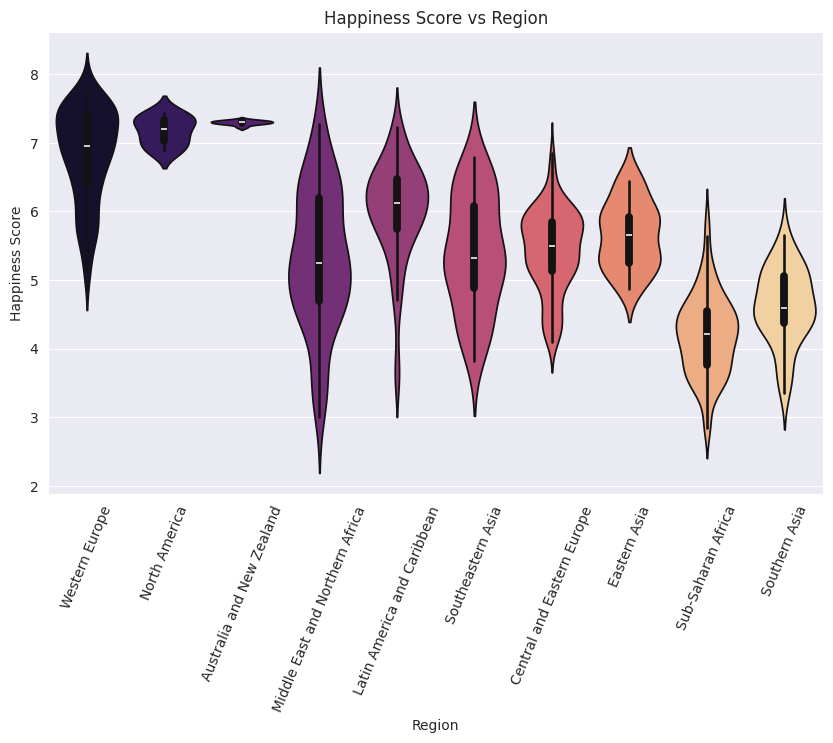

In [21]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Region', y='Happiness Score', data=df, palette='magma', hue='Region')
plt.title('Happiness Score vs Region')
plt.xticks(rotation=67.5)
plt.show()

La anterior gráfica muestra la distribución de la felicidad en cada región; podemos obersevar que:
- Western Europa en promedio cuenta con los países de mayor felicidad, en otras palabras, es muy poco probable encontrar un país de baja felicidad en esta región.
- Las regiones de África cuentan con una amplia distribución de datos, pero la mayoría de estos se encuentran concentrados entre 5 y 6 de felicidad.
- Los paises con mas baja felicidad se encuentran en Sub-Saharan Africa.


# Pairplot

El pairplot nos muestra la relación entre todas las variables. Debido a que son muchas variables, la gráfica es muy grande y no se puede apreciar bien, por lo que se decidió hacer un pairplot con las variables que tienen menos correlación con la felicidad, para poder apreciar mejor la relación entre ellas.

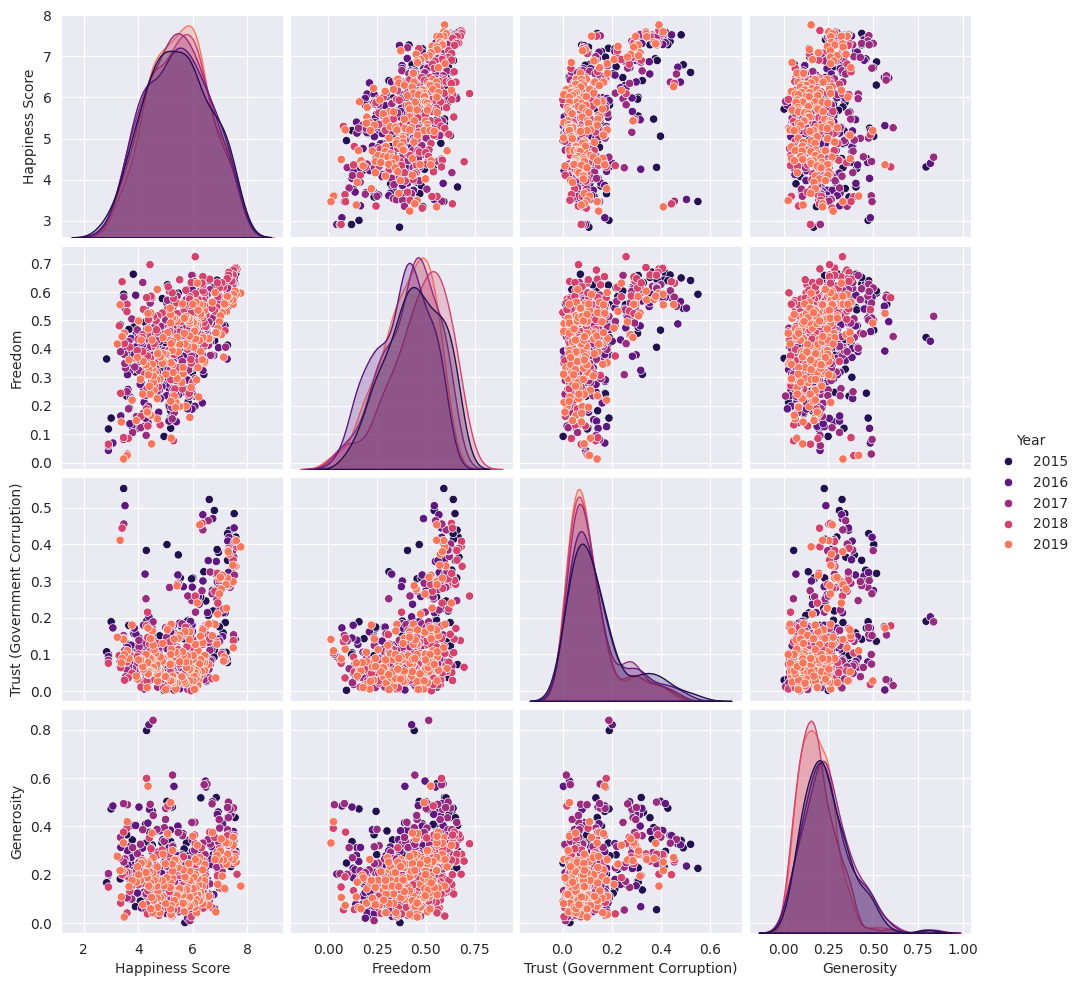

In [22]:
df_copy = df.copy()

df_copy = df_copy.drop('Rank', axis=1)
df_copy = df_copy.drop('Economy (GDP per Capita)', axis=1)
df_copy = df_copy.drop('Health (Life Expectancy)', axis=1)
df_copy = df_copy.drop('Social support', axis=1)

sns.pairplot(df_copy, hue='Year')
plt.show()

# PyTorch: Deep Learning

Podemos crear un modelo que pueda predecir la felicidad de un país dependiendo de su región, su PIB per cápita, soporte social, calidad de vida, libertad, generosidad y confianza en el gobierno. Para esto, utilizaremos un modelo de regresión lineal.

In [23]:
import torch
from torch import nn, optim

Eliminamos las columnas `Country`, `Year` y `Rank` ya que no son necesarias para el modelo.

In [24]:
df.drop(['Country', 'Rank', 'Year'], axis=1, inplace=True)
df.head()

,Region,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


OneHotEncoding para las variables categóricas.

In [25]:
from category_encoders import OneHotEncoder

encoder = OneHotEncoder(cols=['Region'])
df = encoder.fit_transform(df)
df.head()

,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,Region_10,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,1,0,0,0,0,0,0,0,0,0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,1,0,0,0,0,0,0,0,0,0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,1,0,0,0,0,0,0,0,0,0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,1,0,0,0,0,0,0,0,0,0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,0,1,0,0,0,0,0,0,0,0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [26]:
df_columns = df.columns

predictors = df[df_columns[df_columns != 'Happiness Score']]
target = df['Happiness Score']

Normalizamos los datos para que el modelo pueda trabajar con ellos.

In [27]:
from sklearn import preprocessing
predictors = preprocessing.StandardScaler().fit(predictors).transform(predictors)

from sklearn.model_selection import train_test_split

# Split the data into training, validation, and test sets. 60% training, 20% validation, 20% test
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

PyTorch trabaja directamente con tensors, por lo que convertimos los datos a tensores.

In [28]:
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
y_test = torch.tensor(y_test.values, dtype=torch.float32).reshape(-1, 1)
y_val = torch.tensor(y_val.values, dtype=torch.float32).reshape(-1, 1)

Creamos un modelo de regresión lineal, el modelo con las siguientes características:
- 2 hidden layers
- ReLU como función de activación

In [29]:
class RegressionModel(nn.Module):
    # Constructor
    def __init__(self, input_size):
        super(RegressionModel, self).__init__()
        self.layer1 = nn.Linear(input_size, 1024)
        self.layer2 = nn.Linear(1024, 32)
        self.layer3 = nn.Linear(32, 32)
        self.layer4 = nn.Linear(32, 1)

    # Prediction function
    def forward(self, x):
        yhat = torch.relu(self.layer1(x))
        yhat = torch.relu(self.layer2(yhat))
        yhat = torch.relu(self.layer3(yhat))
        yhat = self.layer4(yhat)
        return yhat

Variables necesarias para modelo.

In [30]:
criterion = nn.MSELoss() # funciton to calculate the loss

n_epochs = 100
lr = 0.001
batch_size = 32

history = []

Entrenamos el modelo con el optimizador AdamW y el scheduler OneCycleLR

In [31]:
from torch.utils.data import DataLoader, TensorDataset
from torch.optim.lr_scheduler import OneCycleLR
from tqdm.auto import tqdm
from timeit import default_timer as timer

def get_data_loaders(train_data, val_data, batch_size, device):
    kwargs = {'num_workers': 1, 'pin_memory': True} if device=='cuda' else {}
    trainloader = DataLoader(train_data, batch_size=batch_size, shuffle=True, **kwargs)
    valloader = DataLoader(val_data, batch_size=batch_size, shuffle=False, **kwargs)
    return trainloader, valloader

def train_epoch(model, trainloader, criterion, optimizer, device):
    model.train()
    train_loss = 0
    for X_batch, y_batch in trainloader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        yhat = model(X_batch)
        loss = criterion(yhat, y_batch)
        optimizer.zero_grad(set_to_none=True)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    return train_loss / len(trainloader)

def validate_model(model, valloader, criterion, device):
    model.eval()
    val_loss = 0
    with torch.inference_mode():
        for X_batch, y_batch in valloader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            yhat = model(X_batch)
            loss = criterion(yhat, y_batch)
            val_loss += loss.item()
    return val_loss / len(valloader)

def train_model(iter):
    torch.manual_seed(42)
    train_time_start = timer()

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    train_data = TensorDataset(X_train, y_train)
    val_data = TensorDataset(X_val, y_val)
    trainloader, valloader = get_data_loaders(train_data, val_data, batch_size, device)

    model = RegressionModel(predictors.shape[1]).to(device)
    optimizer = optim.AdamW(model.parameters(), lr=lr)
    total_steps = len(trainloader) * iter # ideal number of steps
    scheduler = OneCycleLR(optimizer, max_lr=1, total_steps=total_steps)  # adjust the learning rate

    best_val_loss = float('inf')
    for epoch in tqdm(range(iter)):
        train_loss = train_epoch(model, trainloader, criterion, optimizer, device)
        val_loss = validate_model(model, valloader, criterion, device)

        if val_loss < best_val_loss:
            torch.save(model.state_dict(), '../models/world_happiness_model.pt')
            best_val_loss = val_loss

        history.append([train_loss, val_loss])
        scheduler.step()
        # if epoch % 10 == 0:
        print(f'Epoch: {epoch+1}/{iter} | Training Loss: {train_loss:.4f} | Validation Loss: {val_loss:.4f}')

    train_time_end = timer()
    print(f'\nTraining time: {train_time_end - train_time_start:.3f}s')

    return model

model = train_model(n_epochs)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1/100 | Training Loss: 18.4545 | Validation Loss: 9.6479
Epoch: 2/100 | Training Loss: 4.3881 | Validation Loss: 4.8473
Epoch: 3/100 | Training Loss: 2.1135 | Validation Loss: 2.7388
Epoch: 4/100 | Training Loss: 1.1778 | Validation Loss: 0.7545
Epoch: 5/100 | Training Loss: 0.6808 | Validation Loss: 0.5173
Epoch: 6/100 | Training Loss: 0.3557 | Validation Loss: 0.4044
Epoch: 7/100 | Training Loss: 0.2455 | Validation Loss: 0.2999
Epoch: 8/100 | Training Loss: 0.1962 | Validation Loss: 0.2699
Epoch: 9/100 | Training Loss: 0.1719 | Validation Loss: 0.2651
Epoch: 10/100 | Training Loss: 0.1691 | Validation Loss: 0.2721
Epoch: 11/100 | Training Loss: 0.1729 | Validation Loss: 0.2681
Epoch: 12/100 | Training Loss: 0.1554 | Validation Loss: 0.2505
Epoch: 13/100 | Training Loss: 0.1396 | Validation Loss: 0.2237
Epoch: 14/100 | Training Loss: 0.1309 | Validation Loss: 0.2696
Epoch: 15/100 | Training Loss: 0.1569 | Validation Loss: 0.2161
Epoch: 16/100 | Training Loss: 0.1650 | Validati

## Visualización de modelo

Obtenemos predicciones y metricas basadas en el mejor lodelo, y visualizamos los resultados.

Mean Squared Error: 0.16022995114326477
R2 Score: 0.8650960678360818
Mean Absolute Error: 0.30643653869628906
Root Mean Squared Error: 0.40028733015060425


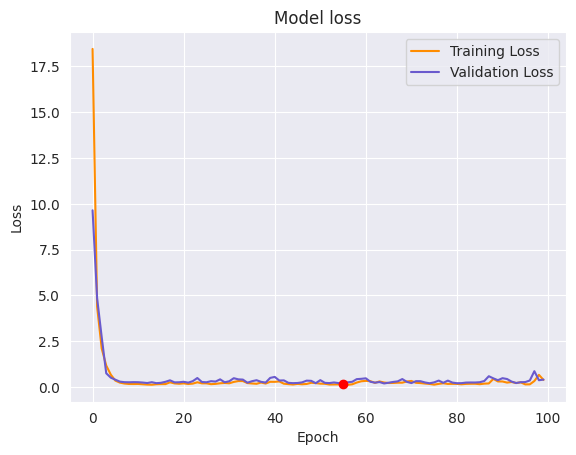

In [32]:
from sklearn import metrics

model.to('cpu') # move model to cpu for testing
model.load_state_dict(torch.load('../models/world_happiness_model.pt'))
model.eval()

with torch.inference_mode():
    yhat = model(X_test)
    mse, mae, r2 = metrics.mean_squared_error(y_test, yhat), metrics.mean_absolute_error(y_test, yhat), metrics.r2_score(y_test, yhat)
    rmse = np.sqrt(mse)

    print(f'Mean Squared Error: {mse}')
    print(f'R2 Score: {r2}')
    print(f'Mean Absolute Error: {mae}')
    print(f'Root Mean Squared Error: {rmse}')

history = np.array(history)

plt.plot(history[:, 0], label='Training Loss', color='darkorange')
plt.plot(history[:, 1], label='Validation Loss', color='slateblue')
best_val_loss_index = history[:, 1].argmin()
plt.plot(best_val_loss_index, history[best_val_loss_index, 1], 'o', color='red')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model loss')
plt.show()

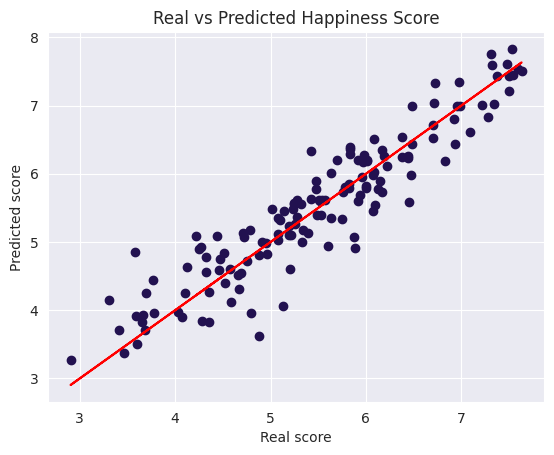

In [33]:
# convert tensors to numpy arrays; run once
yhat = yhat.squeeze().detach().numpy()
y_test = y_test.squeeze().detach().numpy()

# plot the predicted vs actual values
plt.scatter(y_test, yhat)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Real score')
plt.ylabel('Predicted score')
plt.title('Real vs Predicted Happiness Score')
plt.show()

In [34]:
import random

for _ in range(5):
    X_sample, y_sample = random.choice(list(zip(X_test, y_test)))
    with torch.inference_mode():
        y_pred = model(X_sample)
    print(f"Predicted: {y_pred.item()}, Actual: {y_sample.item()}")

Predicted: 6.712506294250488, Actual: 6.704999923706055
Predicted: 4.2497735023498535, Actual: 4.10699987411499
Predicted: 5.236817836761475, Actual: 5.193999767303467
Predicted: 5.1072468757629395, Actual: 5.211999893188477
Predicted: 6.987246513366699, Actual: 6.951000213623047


# Conclusiones

De acuerdo a este dataset:
- La felicidad de un país está relacionada en gran parte con su PIB per capita, Social support y Healthy (life expectancy).
- En promedio, la calidad de vida de los paises de Europa es mejor que en cualquier otra region.
- Los paises con mas baja felicidad se encuentran en Sub-Saharan Africa.
- Independientemente de la region, ningun pais tiene confianza en su gobierno.
- Es factible la creación de un modelo de regresión lineal para predecir la felicidad de un país con el dataset proporcionado (85% R2 Score).